In [1]:
from CoachAIUtils import *
import re
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import IPython.display as ht
from ipywidgets import *
from sklearn.linear_model import LogisticRegression
from keras_self_attention import SeqSelfAttention
import tensorflow as tf
import random as rn
import os
from keras import backend as K
from keras.models import load_model


jupy = False

if jupy: get_ipython().magic('matplotlib inline')

teampar = {
    "testsetlist": "0,1",
    "determinista": False,
    "minportfolio": .5,
    "renorm": 1,
    "look_back": 3,
    "look_fwd": 1,
    "team0": 1,
    "teamalfa": 1,
    "teambeta": 1,
    "teamgamma": 1,
    "teamdelta": 1,
}

# In[2]:


# @markdown Mostrar todos los detalles:
debug = True  # @param {type:"boolean"}
logset = []
easetlist = []
grafancho = 12
grafalto = 6
loadfichport = "21Oct19"
loadfichset = "20Oct19"
loadfichteam = ""
savefich = ""
alfas = []

# Selección de Datos
# ___________________________
# Sets a incluir en test:ptestsetlist
# 
# Años a incluir en test:ptestyearlist
# 


easetstest = []
yearstest = []
loadedsets = []
portpred = []
testsetlist = "0,1"
testyearlist = "2015,2016,2017,2018,2019"
dire=".\\"
trd = np.array(np.zeros((1, 10000, 70)), dtype=object)
testsplit=200
def create_dataset(dataset, plback_alfas=2, plfwd_alfas=0, ptestsplit=200):
    datax, datay = [], []
    lookback = plback_alfas
    lookahead = plfwd_alfas

    tot = 1
    for j in range(0, len(dataset) - lookback - lookahead):
        a = dataset[j: j + lookback]
        b = dataset[j + lookback + lookahead]
        if b == 0.0:
            continue
        if j >= ptestsplit:
            datax.append(a)
            datay.append(b)
        tot += 1

    return np.array(datax), np.array(datay)


def cargaparteam(ptestsetlist, ptestyearlist, ploadfichport, pgrafancho, pgrafalto):
    global teampar, loadfichport, grafancho, grafalto, model, portpar, alfas, portpred

    teampar = {"testsetlist": ptestsetlist, "testyearlist": ptestyearlist, "determinista": False, "minportfolio": .5, "renorm": 1, "look_back": 3, "look_fwd": 1, "team0": 1, "teamalfa": 1, "teambeta": 1, "teamgamma": 1, "teamdelta": 1}

    loadfichport = ploadfichport

    if loadfichport != "":
        portpar = json.load(open(dire + "portpar-" + loadfichport + ".json"))
        model = load_model(dire + "team-" + loadfichport + ".h5")
        portpred = pd.read_csv(dire + "portdat-" + ploadfichport + ".csv", sep=";", index_col=0)
        for y in ptestyearlist.split(","):
            yearstest.append(y)
        alfas = portpred.loc["NomAjuste"]
        print ("Cargado "+ loadfichport)

    grafancho = pgrafancho
    grafalto = pgrafalto

    return "Cargado"

Using TensorFlow backend.


# Datos de Set

## Selección de Datos
##  ___________________________
Sets a incluir en training:ptrainsetlist

Años a incluir en training:ptrainyearlist

Sets a incluir en test:ptestsetlist

Años a incluir en test:ptestyearlist
 
## Parámetros Set
## ______________
pmodeltype: Modelo

peslabones: Tipo de eslabon (eg: 5 mira los 5 ultimos trades)

plook_back: Longitud de la cadena (eg: 10 entrena con los ultimos 10 eslabones)

plook_fwd: Lag de la predicción (0 intenta predecir siguiente eslabon, 1 dos eslabones despues...)

pruns: Numero de veces que entrenamos

Eslabones solapados o secuenciales:poverlap

Si marcas multiyear, habra un grafico por set y no por año: pmultiyear

Nuevo lotaje:plota, plotb, plotc, plotd

Tamaño Gráficos:pgrafancho, pgrafalto
 
## Parametros de los modelos:
## __________________________
Número de pasadas:pepochs

Número de elementos en cada pasada:pbatch_size

% de los datos que se usan para validación:pvalidation_split

Optimizador: poptimizador

Learning Rate: Tamaño de la actualizacion en gradient descent:plr

Reduccion progresiva del learning rate:pdecay

Celdas a desactivar cada pasada del estado oculto para prevenir overfitting:pdropout

Celdas a desactivar de la "memoria" para prevenir overfitting:precurrent_dropout
 

In [2]:
interact_manual(cargaparteam,
        ptestsetlist = testsetlist,
        ptestyearlist = testyearlist,
        pgrafancho=grafancho,  # @param {type:"slider", min:-100, max:100, step:1}
        pgrafalto=grafalto,  # @param {type:"slider", min:-100, max:100, step:1}
        ploadfichport = loadfichport
)

print("Configuraciones de Sets")
for portfich in os.listdir(dire):
    if re.match("teampar.*.json", portfich):
        print(portfich[7:-5])


interactive(children=(Text(value='0,1', description='ptestsetlist'), Text(value='2015,2016,2017,2018,2019', de…

Configuraciones de Sets
-21Oct19
-24Oct19


Cargado 21Oct19
(77, 3)


C:\Users\diego\Documents\CoachAI\CoachAIUtils.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ptrd[ptrd == 0] = "@"
C:\Users\diego\Documents\CoachAI\CoachAIUtils.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ptrd[ptrd == 1] = "Alfa"
C:\Users\diego\Documents\CoachAI\CoachAIUtils.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ptrd[ptrd == 2] = "Beta"
C:\Users\diego\Documents\CoachAI\CoachAIUtils.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

<h2>Evolución del Portfolio</h2><h3>___________________________________________________</h3><h3>0.00% Mejorados tras ajuste (0 mejorados de 76)</h3>
<table><tr><td></td><td>Original</td><td>Aprendido</td><td>Ajustado</td></tr><tr><td>Ratio Máximo:</td><td>(0.00$/0.00$)</td><td>(0.00$/0.00$) </td><td>(322.16$/-260.58$) </td></tr></table>


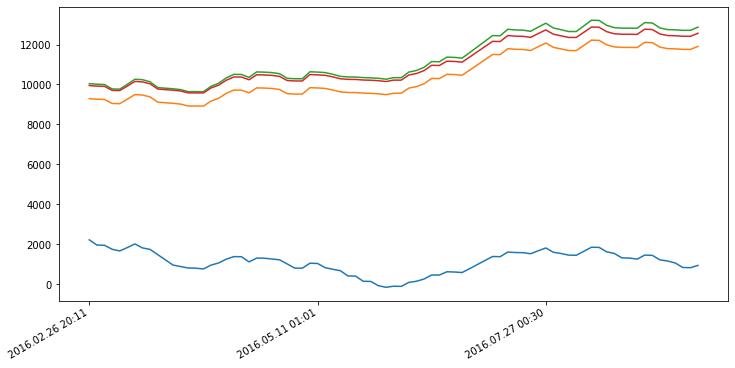

In [8]:

# In[5]:



def aplicapred(lote, letra):
    if letra == 1:
        newlot = lote * lota
    elif letra == 2:
        newlot = lote * lotb
    elif letra == 3:
        newlot = lote * lotc
    elif letra == 4:
        newlot = lote * lotd
    else:
        newlot = 0

    newlot = round(newlot, 2)
    return newlot




# Predecir Set


# In[11]:


def predice(pmodel, pxtest):
    if debug:
        print(pxtest.shape)
    if portpar["modeltype"] == "LSTM":
        pxtest = to_categorical(pxtest, num_classes=5)
    y_pred = pmodel.predict(pxtest, verbose=(0 + debug * 2))

    pred = np.argmax(y_pred, axis=1)
    return pred


def construyeteam(pport, ppred):
    maxoldpl, maxoldacc, maxolddraw, minoldpl, minoldacc, maxnewpl, maxnewacc, minnewpl, minnewacc, maxnewdraw, posoldacc, numposold, negoldacc, numnegold, posnewacc, numposnew, negnewacc, numnegnew, sumimprov, sumnonimprov = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    s = "<h2>Evolución del Portfolio</h2>"
    f = lambda x: chr(ord("A") + int(x) - 1)
    letvec = np.vectorize(f)
    di = {'0': teampar["team0"], 0: teampar["team0"], '1': teampar["teamalfa"], 1: teampar["teamalfa"], '2': teampar["teambeta"], 2: teampar["teambeta"], '3': teampar["teamgamma"], 3: teampar["teamgamma"], '4': teampar["teamdelta"], 4: teampar["teamdelta"]}
    mapdi = lambda x: di[x]
    comienzo = dameiniciomin(portpred, teampar["minportfolio"])
    teamajustenombres= pd.DataFrame(ppred[comienzo:])
    teamajuste = teamajustenombres.applymap(mapdi)

    pportteam = pport[colsport["Time"]:colsport["LotAjust"]+1]
    pportteam = pportteam.append(pport.iloc[colsport["LotAjust"]]) #LotTeam
    pportteam = pportteam.append(pport[colsport["PLOrig"]:colsport["PLAjust"]+1])
    pportteam = pportteam.append(pport.iloc[colsport["PLAjust"]])  # PLTeam
    pportteam = pportteam.append(pport[colsport["DDOrigin"]:colsport["AccAjust"]+1])
    pportteam = pportteam.append(pport.iloc[colsport["AccAjust"]])  # AccTeam
    pportteam = pportteam.append(pport[colsport["NomAjuste"]:colsport["Ajuste"]+1])
    pportteam = pportteam.append(pport.iloc[colsport["Ajuste"]])  # NomTeam
    pportteam = pportteam.append(pport.iloc[colsport["Ajuste"]])  # Team
    pportteam = pportteam.append(pport.iloc[colsport["Last"]+1:])
    pportteam.iloc[colsteam["NomTeam"],:] = 0
    pportteam.iloc[colsteam["NomTeam"], -len(teamajustenombres):] = [teamajustenombres.iloc[i,0] for i in range(len(teamajustenombres))]
    pportteam.iloc[colsteam["Team"],:] = 1
    pportteam.iloc[colsteam["Team"], -len(teamajuste):] = [int(teamajuste.iloc[i]) for i in range(len(teamajuste))]
    pportteam.iloc[colsteam["LotTeam"]] = [np.round(float(pportteam.iloc[colsteam["LotAprend"], i]) * float(pportteam.iloc[colsteam["Team"], i]), 2)
                                          for i in range(len(pportteam.iloc[colsteam["LotAjust"]]))]
    pportteam.iloc[colsteam["PLTeam"]] = [np.round(float(pportteam.iloc[colsteam["PLOrig"], i]) / float(pportteam.iloc[colsteam["LotOrig"], i]) * float(pportteam.iloc[colsteam["LotTeam"], i]), 2)
                                          for i in range(len(pportteam.iloc[colsteam["LotAjust"]]))]

    accteam, maxteampl, maxajacc, minteampl, minteamacc, maxteamdraw, improv, sumteamimprov, sumteamnonimprov, posteamacc, numposteam, negteamacc, numnegteam = 10000, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for i in range(len(pportteam.iloc[colsteam["LotTeam"]])):
        accteam = accteam + pportteam.iloc[colsteam["PLTeam"], i] if "Cierra" in pportteam.iloc[colsteam["Trade"], i] else accteam
        pportteam.iloc[colsteam["AccTeam"], i] = accteam
        maxteampl = max(maxteampl,  pportteam.iloc[colsteam["PLTeam"], i])
        maxajacc = max(maxajacc, accteam)
        minteampl = min(minteampl, pportteam.iloc[colsteam["PLTeam"], i])
        minteamacc = min(minteamacc, accteam)
        maxteamdraw = max(maxteamdraw, maxajacc - accteam)
        improv = improv + 1 if float(pportteam.iloc[colsteam["PLTeam"], i]) > float(pportteam.iloc[colsteam["PLAprend"], i]) else improv
        sumteamimprov = sumteamimprov + pportteam.iloc[colsteam["PLTeam"], i] if float(pportteam.iloc[colsteam["PLTeam"], i]) > float(pportteam.iloc[colsteam["PLAprend"], i])  else sumteamimprov
        sumteamnonimprov = sumteamnonimprov + pportteam.iloc[colsteam["PLTeam"], i] if float(pportteam.iloc[colsteam["PLAjust"], i]) <= float(pportteam.iloc[colsteam["PLAprend"], i]) else sumteamnonimprov
        posteamacc += pportteam.iloc[colsteam["PLTeam"], i] if pportteam.iloc[colsteam["PLTeam"], i] >= 0 else 0
        numposteam += 1 if pportteam.iloc[colsteam["PLTeam"], i] >= 0 else 0
        negteamacc += pportteam.iloc[colsteam["PLTeam"], i] if pportteam.iloc[colsteam["PLTeam"], i] < 0 else 0
        numnegteam += 1 if pportteam.iloc[colsteam["PLTeam"], i] < 0 else 0

    pportteam = pportteam.T
    cols = pportteam.columns.values
    for a in colsteam.keys():
        cols[colsteam[a]] = a
    cols[colsteam["Team"]] = "Team"
    pportteam.columns = cols
    pportteam["AccOrig"] = pd.to_numeric(pportteam["AccOrig"],errors='coerce')
    pportteam["AccAprend"] = pd.to_numeric(pportteam["AccAprend"],errors='coerce')
    pportteam["AccAjust"] = pd.to_numeric(pportteam["AccAjust"],errors='coerce')
    pportteam["PLOrig"] = pd.to_numeric(pportteam["PLOrig"],errors='coerce')
    pportteam["NomAjuste"] = numbers2alfas(pportteam["NomAjuste"])
    pportteam["NomTeam"] = numbers2alfas(pportteam["NomTeam"])
    pportteam["DDOrigin"] = ""
    ht.display(ht.HTML(pportteam.to_html(float_format=lambda x: '%6.2f' % x)))
    s += "<h3>___________________________________________________</h3>"
    #s += "<h3>Ajustes: {} Alfas - {} Betas - {} Gammas - {} Deltas</h3>".format(numalfa, numbeta, numgamma, numdelta)
    s += "<h3>{:.2f}% Mejorados tras ajuste ({} mejorados de {})</h3>".format(improv * 100 / len(teamajuste), improv,
                                                                              len(teamajuste))

    if jupy:
        ht.display(ht.HTML(s))
    else:
        print(s)

    s = "<table>"
    s += "<tr><td></td><td>Original</td><td>Aprendido</td><td>Ajustado</td></tr>"
    #s += "<tr><td>NP:</td><td>{:,.2f}$</td><td>{:,.2f}$ ({}%)</td><td>{:,.2f}$ ({}%)</td></tr>".format(antoldacc, antnewacc,
    #                                                                                                int((
    #                                                                                                            antnewacc / antoldacc - 1) * 100),
    #                                                                                                accteam, int(
    #        (accteam / antoldacc - 1) * 100))
    #s += "<tr><td>Max Drawdown:</td><td style='color: {}'>{:,.2f}$</td><td style='color: {}'>{:,.2f}$ </td><td style='color: {}'>{:,.2f}$ </td></tr>".format(drawcolor(maxolddraw), maxolddraw,
    #                                                                                                drawcolor(maxnewdraw), maxnewdraw,
    #                                                                                                drawcolor(maxteamdraw), maxteamdraw)
    #s += "<tr><td>PF:</td><td>{:.2f}</td><td>{:.2f} (x{:.2f})</td><td>{:.2f} (x{:.2f})</td></tr>".format(
    #    - posoldacc / negoldacc, - posnewacc / negnewacc, (posnewacc / negnewacc) / (posoldacc / negoldacc),
    #    - posteamacc / negteamacc, (posteamacc / negteamacc) / (posteamacc / negteamacc))
    #s += "<tr><td>PF Mejora:</td><td></td><td>{:.2f}</td><td>{:.2f}</td></tr>".format(sumimprov / sumnonimprov, sumteamimprov / sumteamnonimprov)
    #s += "<tr><td>EM:</td><td>{:,.2f}$</td><td>{:,.2f}$ (x{:.2f})</td><td>{:,.2f}$ (x{:.2f})</td></tr>".format(
    #    antoldacc / len(letras), antnewacc / len(letras), (antnewacc / len(letras)) / (antoldacc / len(letras)),
    #    accteam / len(letras), (accteam / len(letras)) / (antoldacc / len(letras)))
    s += "<tr><td>Ratio Máximo:</td><td>({:,.2f}$/{:,.2f}$)</td><td>({:,.2f}$/{:,.2f}$) </td><td>({:,.2f}$/{:,.2f}$) </td></tr>".format(
        maxoldpl, minoldpl, maxnewpl, minnewpl, maxteampl, minteampl)
    #s += "<tr><td>Ratio Medio:</td><td>({:,.2f}$/{:,.2f}$)</td><td>({:,.2f}$/{:,.2f}$) </td><td>({:,.2f}$/{:,.2f}$) </td></tr>".format(
    #    posoldacc / numposold, negoldacc / numposold, posnewacc / numposnew, negnewacc / numnegnew, posteamacc / numposteam,
    #    negteamacc / numnegteam)
    s += "</table>"
    if jupy:
        ht.display(ht.HTML(s))
    else:
        print(s)

    fig, ax = plt.subplots()
    fig.set_size_inches(grafancho, grafalto)
    ax.plot(pportteam["Time"], pportteam["AccOrig"])
    ax.plot(pportteam["Time"], pportteam["AccAprend"])
    ax.plot(pportteam["Time"], pportteam["AccAjust"])
    ax.plot(pportteam["Time"], pportteam["AccTeam"])
    plt.minorticks_off()
    ax.set_xticks(pportteam["Time"][::30])
    ax.set_xticklabels(pportteam["Time"][::30])
    fig.autofmt_xdate()
    plt.show()
    return pportteam


if not jupy:
    cargaparteam(testsetlist, testyearlist, loadfichport, grafancho, grafalto)

if len(teampar) > 0:
    alfas = alfas2numbers(alfas)
    X_test, y_test = create_dataset(alfas, plback_alfas=teampar["look_back"], plfwd_alfas=teampar["look_fwd"], ptestsplit=testsplit)

    if len(y_test) == 0:
        print("No hay datos de test, revisa sets y años pls")
        exit(0)

    pred = predice(model, X_test)
    port = construyeteam(portpred.iloc[:,testsplit:], pred)
else:
    print("Selecciona Configuracion y Sets de Test")


## Si no sale nada, dar a Run All Above
## Despues de cargar una configuracion, dar al play en la celda de parametros para refrescar

In [4]:

def grabafich(psavefich):
    global savefich

    savefich = psavefich
    if psavefich != "":
        savejson(setpar, dire + "portpar-" + psavefich)
        pd.DataFrame(port).to_csv(dire + "portdat-" + psavefich + ".csv", sep=";")
        print("Grabado " + psavefich)

    return "Grabado"
# Section [4]





In [5]:
interact_manual(grabafich,
                psavefich= savefich)


interactive(children=(Text(value='', description='psavefich'), Button(description='Run Interact', style=Button…

<function __main__.grabafich>